<a href="https://colab.research.google.com/github/SharathHebbar/Anomaly-Detection-in-IoT-Sensors-using-Machine-Learning/blob/main/Anamoly_detection_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd


loading dataset

In [12]:
data1 = pd.read_csv('/mainSimulationAccessTraces.csv')
data2 = pd.read_csv('/periodicityDataset.csv')

Preprocessing and cleaning the dataset

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351800 entries, 0 to 351799
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sourceID                   351800 non-null  object 
 1   sourceAddress              351800 non-null  object 
 2   sourceType                 351800 non-null  object 
 3   sourceLocation             351800 non-null  object 
 4   destinationServiceAddress  351800 non-null  object 
 5   destinationServiceType     351800 non-null  object 
 6   destinationLocation        351799 non-null  object 
 7   accessedNodeAddress        351799 non-null  object 
 8   accessedNodeType           351651 non-null  object 
 9   operation                  351799 non-null  object 
 10  value                      349749 non-null  object 
 11  timestamp                  351799 non-null  float64
 12  normality                  351799 non-null  object 
dtypes: float64(1), object(12)
mem

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20321 entries, ('washingmachine3', '/agent14/washingmachine3', '/washingService', 'Showerroom', '/agent14/washingmachine3', '/washingService', 'Showerroom', '/agent14/washingmachine3', '/washingService', 'registerService', 'none', 1519801200000) to ('washingmachine3', '/agent14/washingmachine3', '/washingService', 'Showerroom', '/agent12/battery5', '/batteryService', 'Entrance', '/agent12/battery5/charge', '/basic/number', 'read', '4', 1519930788040)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   noting  20321 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [16]:
data1['accessedNodeType'].head(10)

0    /lightControler
1    /lightControler
2    /lightControler
3    /lightControler
4    /movementSensor
5     /sensorService
6    /movementSensor
7     /sensorService
8     /sensorService
9    /movementSensor
Name: accessedNodeType, dtype: object

In [20]:
data1['accessedNodeType'].value_counts()

/sensorService      127531
/derived/boolean     93264
/basic/number        88608
/basic/text          41777
/thermostat            309
/basic/composed        100
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: accessedNodeType, dtype: int64

In [28]:

data1['accessedNodeType'].isnull().value_counts()

False    351651
True        149
Name: accessedNodeType, dtype: int64

In [108]:

data1.sourceLocation.value_counts()

Garage             38849
Watterroom         37740
Entrance           37634
Bathroom           27989
Showerroom         27827
Kitchen            18635
Dinningroom        13219
BedroomChildren    12638
room_6             11436
Bedroom            10791
BedroomParents     10751
room_8             10600
room_9             10554
Livingroom         10426
room_1             10408
room_2             10407
room_3             10402
room_5             10397
room_4             10377
room_10            10361
room_7             10359
Name: sourceLocation, dtype: int64

In [109]:
df1 = data1.dropna()

In [110]:
df1 = pd.DataFrame(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349749 entries, 0 to 351798
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sourceID                   349749 non-null  object 
 1   sourceAddress              349749 non-null  object 
 2   sourceType                 349749 non-null  object 
 3   sourceLocation             349749 non-null  object 
 4   destinationServiceAddress  349749 non-null  object 
 5   destinationServiceType     349749 non-null  object 
 6   destinationLocation        349749 non-null  object 
 7   accessedNodeAddress        349749 non-null  object 
 8   accessedNodeType           349749 non-null  object 
 9   operation                  349749 non-null  object 
 10  value                      349749 non-null  object 
 11  timestamp                  349749 non-null  float64
 12  normality                  349749 non-null  object 
dtypes: float64(1), object(12)
mem

In [111]:
df1['value'].value_counts().index

Index(['1', '0', 'false', 'true', '10', '5', '2', '9', '4', '8',
       ...
       '1.521222122325E12', '1.521224550865E12', '1.521222955959E12',
       '1.521218650668E12', '1.521216758314E12', '1.52121770014E12',
       '12.330177289792143', '37.93988576266547', '1.521219957729E12',
       '1.521223652787E12'],
      dtype='object', length=10607)

In [112]:
df1['value'].value_counts()

1                     56134
0                     49550
false                 25575
true                  14195
10                     9490
                      ...  
1.52121770014E12          1
12.330177289792143        1
37.93988576266547         1
1.521219957729E12         1
1.521223652787E12         1
Name: value, Length: 10607, dtype: int64

In [113]:
df1.loc[df1.value=='twenty',"value"] = '20.0'
df1.loc[df1.value=='false',"value"] = '0'
df1.loc[df1.value=='true',"value"] = '1'
df1.loc[df1.value=='none',"value"] = '0'
df1.loc[df1.value=='0',"value"] = '0.0'
df1['value'] = df1['value'].fillna(value='60.0')
df1 = df1.drop(df1.index[df1.value.str.contains("org.*")])
df1.value = df1.value.astype(float)

In [114]:
df1['value'].value_counts()

0.000000e+00    75501
1.000000e+00    70329
1.000000e+01     9490
5.000000e+00     8346
2.000000e+00     8312
                ...  
1.521224e+12        1
1.521225e+12        1
1.521222e+12        1
1.521220e+12        1
1.521221e+12        1
Name: value, Length: 10590, dtype: int64

In [139]:
for i in df1.columns:
  print(i)

sourceID
sourceAddress
sourceType
sourceLocation
destinationServiceAddress
destinationServiceType
destinationLocation
accessedNodeAddress
accessedNodeType
operation
value
timestamp
normality


Plotting Graphs

In [116]:
from matplotlib import pyplot as plt
import random

counting the number of source locations

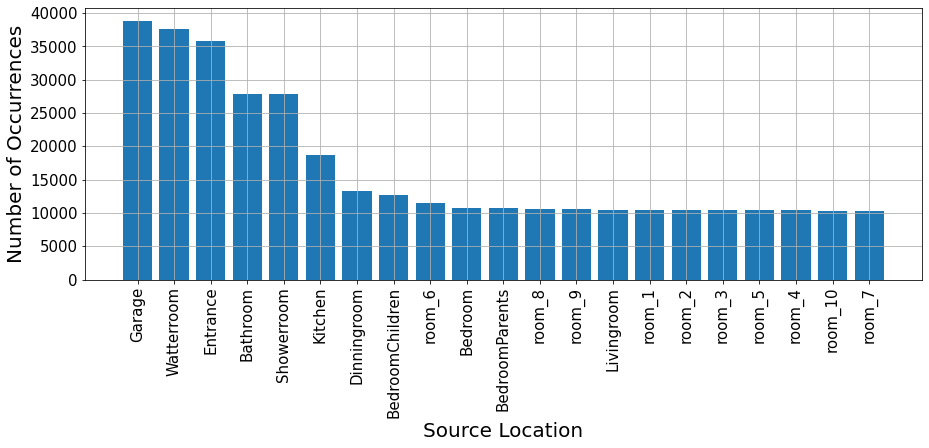

In [159]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.sourceLocation.value_counts().index, df1.sourceLocation.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [120]:
df1.sourceLocation.value_counts()

Garage             38847
Watterroom         37639
Entrance           35851
Bathroom           27841
Showerroom         27827
Kitchen            18618
Dinningroom        13215
BedroomChildren    12635
room_6             11436
Bedroom            10791
BedroomParents     10751
room_8             10600
room_9             10554
Livingroom         10425
room_1             10407
room_2             10406
room_3             10401
room_5             10397
room_4             10377
room_10            10361
room_7             10359
Name: sourceLocation, dtype: int64

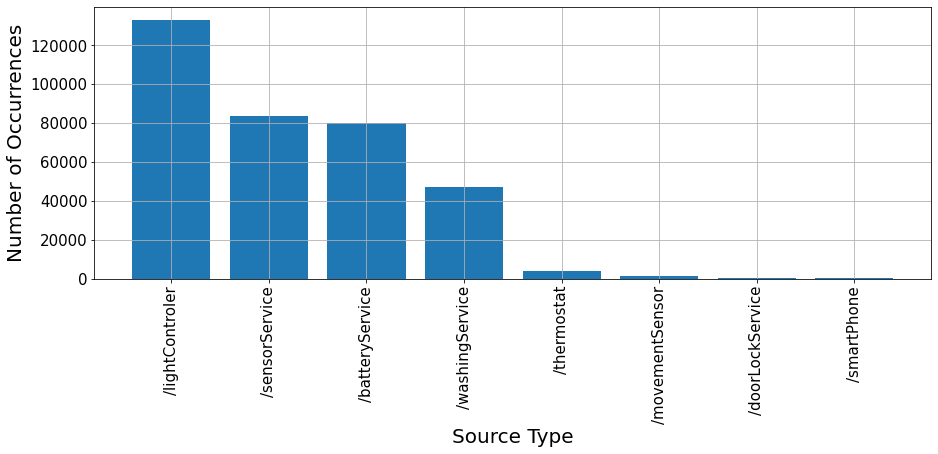

In [160]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.sourceType.value_counts().index, df1.sourceType.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [140]:
print(df1.sourceType.value_counts())


/lightControler     133036
/sensorService       83845
/batteryService      79980
/washingService      47005
/thermostat           4176
/movementSensor       1269
/doorLockService       330
/smartPhone             97
Name: sourceType, dtype: int64


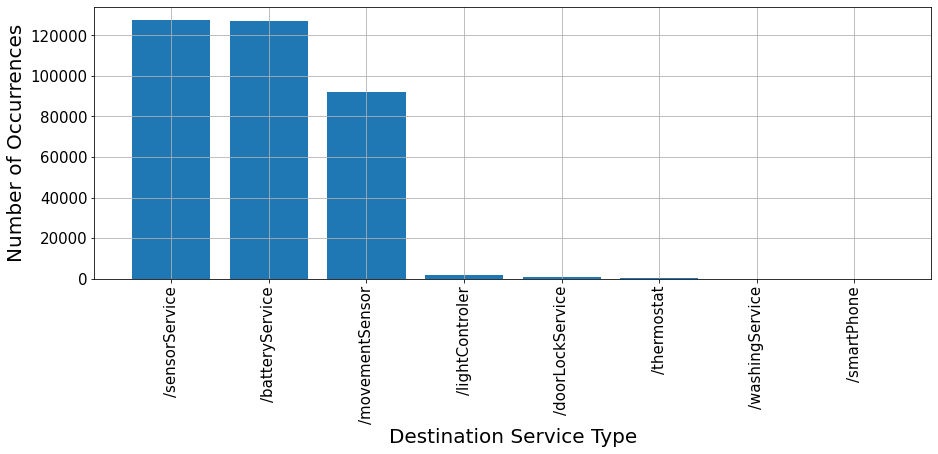

In [161]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.destinationServiceType.value_counts().index, df1.destinationServiceType.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [144]:
df1.destinationServiceType.value_counts()

/sensorService      127689
/batteryService     126867
/movementSensor      92183
/lightControler       1679
/doorLockService       999
/thermostat            315
/washingService          3
/smartPhone              3
Name: destinationServiceType, dtype: int64

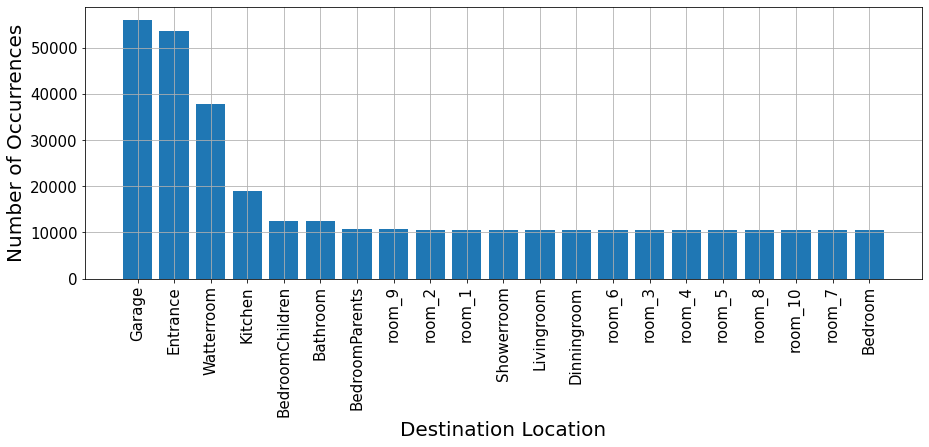

In [162]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.destinationLocation.value_counts().index, df1.destinationLocation.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [146]:
df1.destinationLocation.value_counts()

Garage             56106
Entrance           53553
Watterroom         37780
Kitchen            19028
BedroomChildren    12569
Bathroom           12481
BedroomParents     10742
room_9             10644
room_2             10627
room_1             10610
Showerroom         10598
Livingroom         10585
Dinningroom        10556
room_6             10544
room_3             10535
room_4             10512
room_5             10487
room_8             10452
room_10            10451
room_7             10449
Bedroom            10429
Name: destinationLocation, dtype: int64

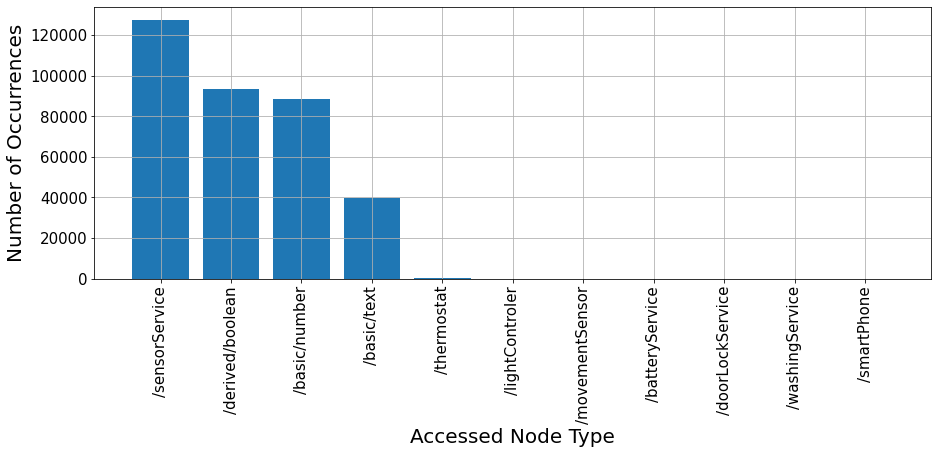

In [163]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.accessedNodeType.value_counts().index, df1.accessedNodeType.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node Type', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [148]:
df1.accessedNodeType.value_counts()

/sensorService      127531
/derived/boolean     93264
/basic/number        88602
/basic/text          39970
/thermostat            309
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: accessedNodeType, dtype: int64

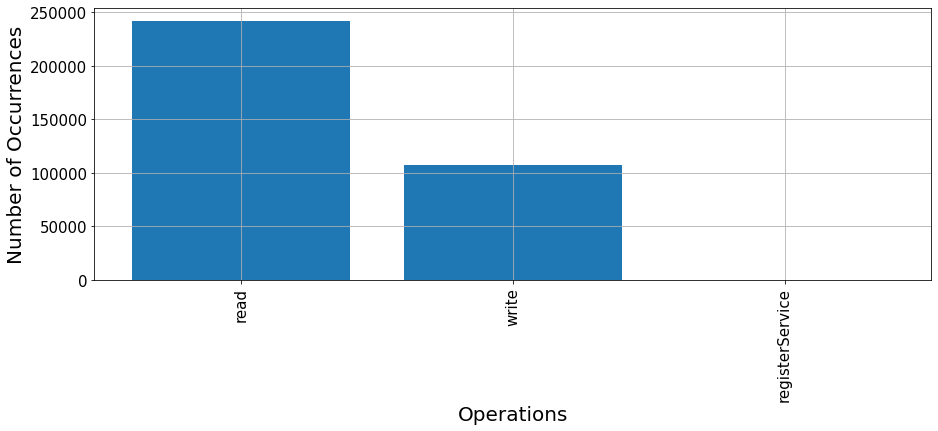

In [169]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.operation.value_counts().index, df1.operation.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operations', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [171]:
df1.operation.value_counts()

read               241859
write              107795
registerService        84
Name: operation, dtype: int64

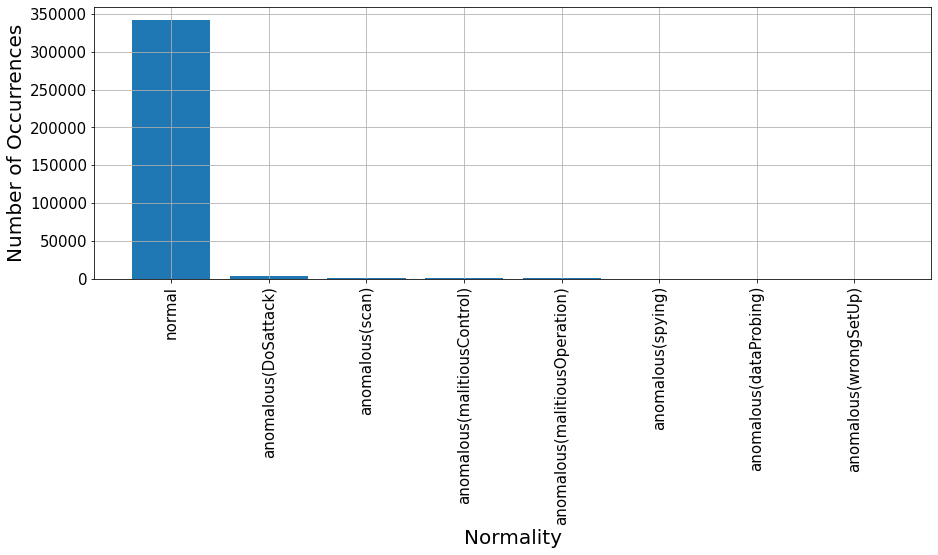

In [172]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
plt.bar(df1.normality.value_counts().index, df1.normality.value_counts().values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [173]:
df1.normality.value_counts()

normal                           341809
anomalous(DoSattack)               4000
anomalous(scan)                    1531
anomalous(malitiousControl)         845
anomalous(malitiousOperation)       657
anomalous(spying)                   532
anomalous(dataProbing)              242
anomalous(wrongSetUp)               122
Name: normality, dtype: int64